# Table of content:

 1. Data Cleaning.
 2. Data Visualization.
 3. PCA for visualization
 4. Models
>     4.1 Random Forest Classifier
>     4.2 Support Vector Classifier
>     4.3 Logistic Regression
>     4.4 Gradient Boost Classifier

 5. ROC and AUC curve.
 6. PCA for speed up the Machine learning Algo: Logistic Regression 

**Don't forget to upvote if you find this kernal usefull :)**
**Happy Learning.**

In [1]:
import numpy as np
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

import os
print(os.listdir("../input"))

['german_credit_data.csv']


In [2]:
df = pd.read_csv('../input/german_credit_data.csv')

In [3]:
print('**********Shape of the Dataset.*******************************************')
print(df.shape)
print('**********Column names******************************************************')
print(df.columns)
print('**********Total number of null values in each column.**********************')
print(df.isnull().sum())
print('**********Total number of unique values in each column*********************')
print(df.nunique())


**********Shape of the Dataset.*******************************************
(1000, 11)
**********Column names******************************************************
Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')
**********Total number of null values in each column.**********************
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64
**********Total number of unique values in each column*********************
Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose      

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.rename(columns=lambda x:x.replace('Unnamed: 0','id'), inplace = True )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
id                  1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [7]:
df['Checking account'].fillna('no-info', inplace = True)
df['Saving accounts'].fillna('no-info', inplace = True)

## EDA:Exploratory Data Analysis(Data Visualization)

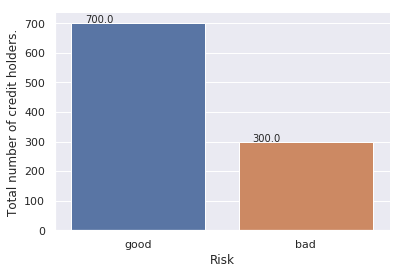

In [8]:
ax = sns.countplot('Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.08,1)
plt.show()

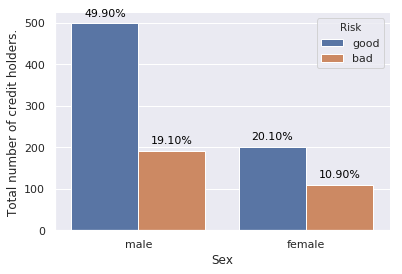

In [9]:
ax = sns.countplot('Sex',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.08,1)
plt.show()

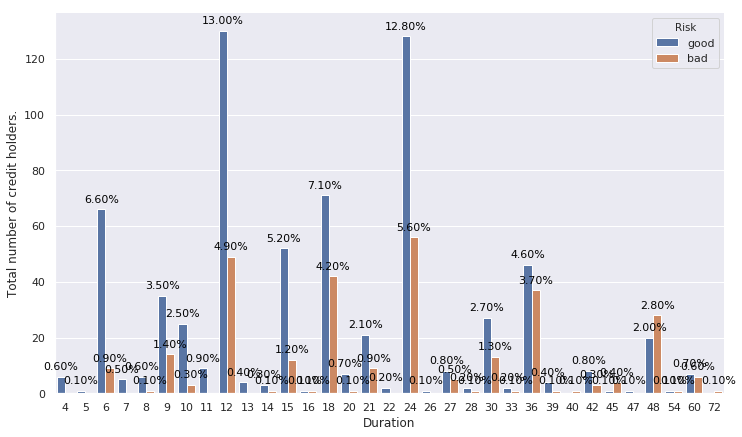

In [10]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Duration',hue='Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot(ax,0.08,1)
plt.show()

In [11]:
gender_df = df.groupby(['Sex','Risk'])['Purpose'].value_counts()
gender_df

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

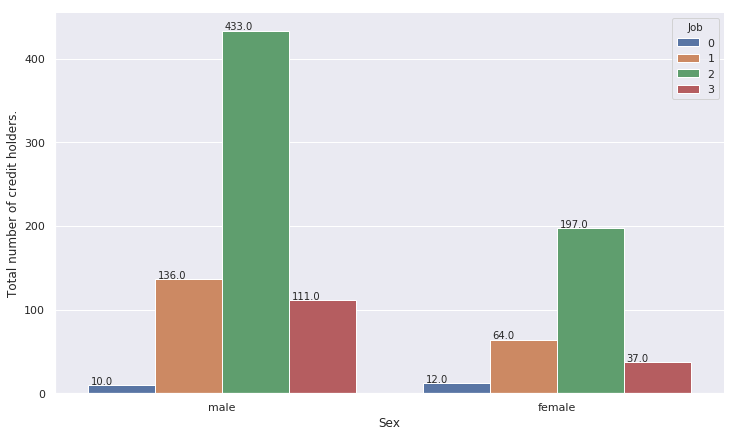

In [12]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Sex',hue='Job', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

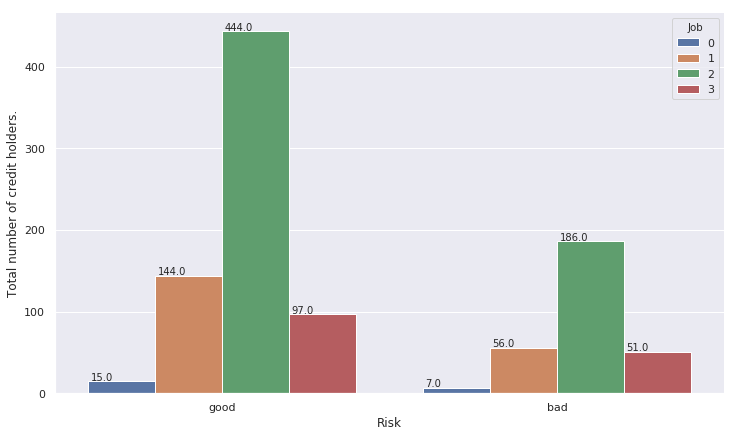

In [45]:
plt.show()
plt.figure(figsize=(12,7))
ax = sns.countplot('Risk',hue='Job', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

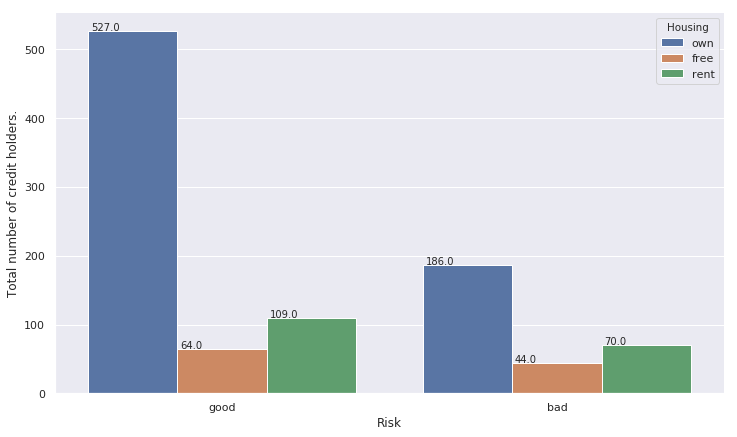

In [14]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Risk',hue='Housing', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

In [31]:
gender_df = df.groupby(['Purpose','Risk'])['Sex'].value_counts()
gender_df

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

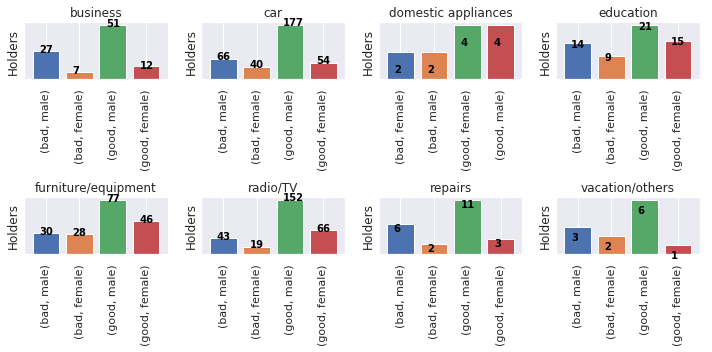

In [37]:
purpose_group = gender_df.groupby('Purpose')
fig = plt.figure()
count =  1

for gender, group in purpose_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (10,5), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

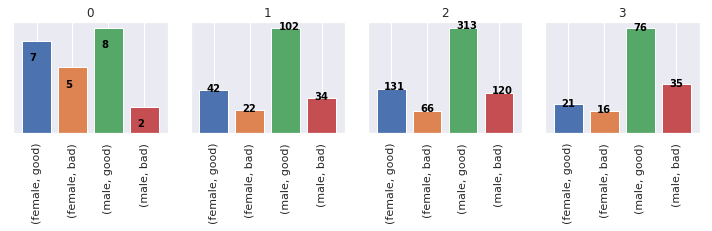

In [57]:
job_df = df.groupby(['Job','Sex'])['Risk'].value_counts()
job_group = job_df.groupby('Job')

fig = plt.figure()
count =  1

for gender, group in job_group:
    ax = fig.add_subplot(2,4,count)
    ax.set_title(gender)
    ax = group[gender].plot.bar(figsize = (10,5), width = 0.8)
    
    count+=1
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Holders')
    
    total_of_holders = []
    for i in ax.patches:
        total_of_holders.append(i.get_height())
        total = sum(total_of_holders)
    for i in ax.patches:
         ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data = df)
plt.show()

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])


In [ ]:
df.head(2)

In [ ]:
sns.countplot('Risk', data = df)
plt.show()

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

## PCA for Data Visualization
**Steps:**
1. **Standardize the Data** - Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.
2. PCA Projection to 2D
3. Visualize 2D Projection

In [ ]:
df.columns

In [ ]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose']
x = df.loc[:,features].values
y = df.loc[:,['Risk']].values #target var

In [ ]:
#Step 1: Standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x) 

In [ ]:
pd.DataFrame(data = X, columns = features).head()

In [ ]:
# Setp 2 : PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform (x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3']) #PC = Principal component 
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf,df[['Risk']]], axis = 1)
finalDf.head()

In [ ]:
# Step 3 - Visualize the Data in 2D.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Risk'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

## Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_

## Select the Dependent(target) and Independent Variables:

In [ ]:
y = df['Risk']
X = df.drop(['Risk','id'], axis = 1)

In [ ]:
#Split the dataset into train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
y_test.value_counts()

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [ ]:
#let's check what params will be best suitable for random forest classification.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train, y_train)


In [ ]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

In [ ]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train,y_train,cv = 10).mean()
print('cross val score:', score_rfc)

## SupportVectorClassifier:

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train, y_train)

In [ ]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

In [ ]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)

print('Accuracy:',accuracy_score(svc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))

# Let's make sure the data is not overfitting
score_svc = cross_val_score(svc_clf,X_train,y_train, cv = 10).mean()
print('cross val score:', score_svc)

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('Accuracy:',accuracy_score(lr_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(lr_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test))

# Let's make sure the data is not overfitting
score_lr = cross_val_score(lr,X_train,y_train,cv=10).mean()
print('cross val score:', score_lr)

## Gradient Boosting: Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

print('Accuracy:',accuracy_score(gbc_pred,y_test) )
print('Confusion Matrix:', confusion_matrix(gbc_pred,y_test,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(gbc_pred,y_test))

# Let's make sure the data is not overfitting
score_gbc = cross_val_score(gbc,X_train,y_train, scoring='accuracy', cv = 10).mean()
print('cross val score:', score_gbc)

In [ ]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier', 'Support Vector Classifier'],
                      'Score':[score_rfc,score_lr,score_gbc,score_svc]})
models.sort_values(by='Score', ascending = False)


****Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.****

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:****

* .90-1 = excellent (A)

* .80-.90 = good (B)

* .70-.80 = fair (C)

* .60-.70 = poor (D)

* .50-.60 = fail (F)

## ROC and AUC curve:
* ROC - ROC make it easy to identify the best threshold for making a decision.
* AUC - AUC help us to decide which categorization method is better.

In [ ]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

from sklearn import metrics

#gbc
gbc_prob = gbc.predict_proba(X_test)[:,1]
fprgbc, tprgbc, thresholdsgbc = metrics.roc_curve(y_test, gbc_prob)
roc_auc_gbc = metrics.auc(fprgbc,tprgbc)
ax_arr[0,0].plot(fprgbc, tprgbc,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for GBC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#For All
ax_arr[1,1].plot(fprgbc,tprgbc, label ='Gradient Boost', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train)

In [ ]:
pca.n_components_

In [ ]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_X, y_train)

In [ ]:
logR_pred = logisticRegr.predict(test_X)

In [ ]:
logisticRegr.score(test_X,y_test)

In [ ]:
confusion_matrix(logR_pred,y_test)

In [ ]:
logR_cross_val_score = cross_val_score(logisticRegr,train_X,y_train, cv = 10).mean()
logR_cross_val_score